In [59]:
from sklearn.datasets import make_regression    # to generate toy dataset
import matplotlib.pyplot as plt                 # to visualise data 
import numpy as np                              # for arrays

In [60]:
xvals, yvals = make_regression(n_samples=200, n_features=1, noise=40, random_state=0)
xvals, yvals = xvals.reshape(xvals.shape[0]), yvals.reshape(yvals.shape[0]) # reshaping to correct shape
# n_samples = number of data points in dataset (x-y paired values)
# n_features = number of features (x values) affecting each y value
# noise = strength of correlation between x and y. Higher value indicates lower strength.

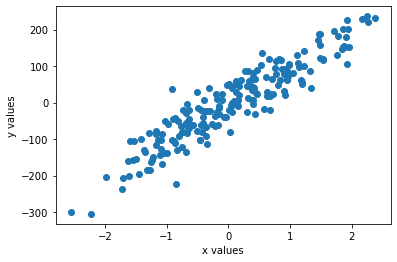

In [61]:
plt.scatter(xvals,yvals)    # plot x and y values
plt.xlabel("x values")      # label x-axis
plt.ylabel("y values")      # label y-axis
plt.show()                  # show graph

In [62]:
np.random.seed(seed=0)
w = np.random.rand(1)[0]
b = np.random.rand(1)[0]

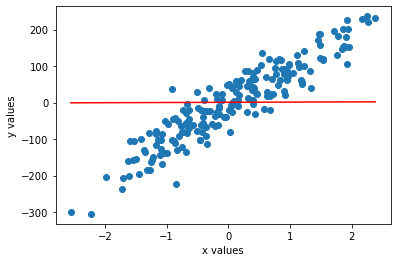

In [63]:
def forward(w,b,x):
    return (w*x) + b

def plot_data(xvals, yvals, w, b):
    plt.scatter(xvals, yvals) # plotting dataset
    plt.xlabel("x values")
    plt.ylabel("y values")
    y_start = forward(w, b, xvals.min())
    y_end = forward(w, b, xvals.max())
    plt.plot([xvals.min(), xvals.max()], [y_start, y_end], c="red") 
    # plotting line from start to end coordinates
    plt.show()

plot_data(xvals, yvals, w, b)

In [64]:
def mse_loss(yhat_vals, yvals):
    return ((yhat_vals - yvals)**2).mean()
    
def w_grad(xvals, yhat_vals, yvals): # Gradient of L wrt w
    sum_ = np.sum((yhat_vals - yvals)* xvals)
    return sum_ * (2/len(xvals))

def b_grad(yhat_vals, yvals): # Gradient of L wrt b
    sum_ = np.sum(yhat_vals - yvals)
    return sum_ * (2/len(yvals))

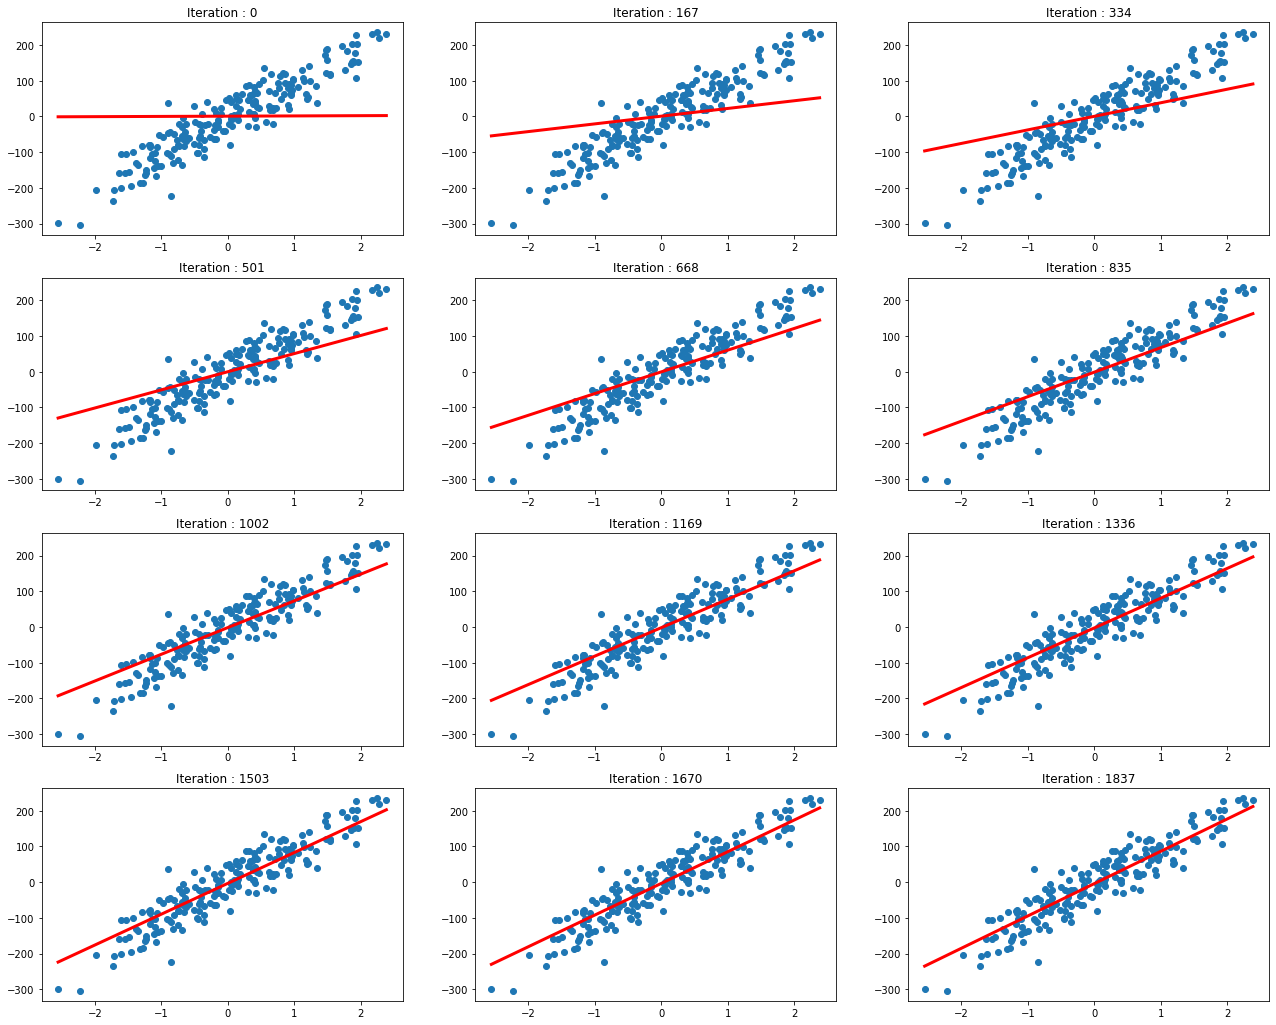

In [65]:
lr = 0.0007     # learning rate
epochs = 2000   # number of iterations

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(22,18))
ax = ax.flatten()
ax_counter = 0

for i in range(epochs):
    yhat_vals = forward(w,b,xvals)          # forward pass through model
    wgrad = w_grad(xvals, yhat_vals, yvals) # calculating gradient L wrt w
    bgrad = b_grad(yhat_vals, yvals)        # calculating gradient L wrt b
    w = w - (wgrad*lr)                      # updating w 
    b = b - (bgrad*lr)                      # updating b
    if i % ((epochs // 12)+1) == 0 :        # plots every 12 iterations
        ax[ax_counter].scatter(xvals,yvals)
        y_start = forward(w, b, xvals.min())
        y_end = forward(w, b, xvals.max())
        ax[ax_counter].plot([xvals.min(), xvals.max()], [y_start, y_end], c='r', linewidth=3)
        ax[ax_counter].set_title(f'Iteration : {i}')
        ax_counter += 1